In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv('/content/thyroidDF.csv')

In [3]:
data.head()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_meds,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG,referral_source,target,patient_id
0,29,F,f,f,f,f,f,f,f,t,...,NaN,f,NaN,f,NaN,f,NaN,other,-,840801013
1,29,F,f,f,f,f,f,f,f,f,...,128.0,f,NaN,f,NaN,f,NaN,other,-,840801014
2,41,F,f,f,f,f,f,f,f,f,...,NaN,f,NaN,f,NaN,t,11.0,other,-,840801042
3,36,F,f,f,f,f,f,f,f,f,...,NaN,f,NaN,f,NaN,t,26.0,other,-,840803046
4,32,F,f,f,f,f,f,f,f,f,...,NaN,f,NaN,f,NaN,t,36.0,other,S,840803047


In [5]:
data['target'].unique()

array(['-', 'S', 'F', 'AK', 'R', 'I', 'M', 'N', 'G', 'K', 'A', 'KJ', 'L',
       'MK', 'Q', 'J', 'C|I', 'O', 'LJ', 'H|K', 'D', 'GK', 'MI', 'P',
       'FK', 'B', 'GI', 'C', 'GKJ', 'OI', 'D|R', 'E'], dtype=object)

In [6]:
data.shape

(9172, 31)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9172 entries, 0 to 9171
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  9172 non-null   int64  
 1   sex                  8865 non-null   object 
 2   on_thyroxine         9172 non-null   object 
 3   query_on_thyroxine   9172 non-null   object 
 4   on_antithyroid_meds  9172 non-null   object 
 5   sick                 9172 non-null   object 
 6   pregnant             9172 non-null   object 
 7   thyroid_surgery      9172 non-null   object 
 8   I131_treatment       9172 non-null   object 
 9   query_hypothyroid    9172 non-null   object 
 10  query_hyperthyroid   9172 non-null   object 
 11  lithium              9172 non-null   object 
 12  goitre               9172 non-null   object 
 13  tumor                9172 non-null   object 
 14  hypopituitary        9172 non-null   object 
 15  psych                9172 non-null   o

In [8]:
data.isnull().sum()

age                       0
sex                     307
on_thyroxine              0
query_on_thyroxine        0
on_antithyroid_meds       0
sick                      0
pregnant                  0
thyroid_surgery           0
I131_treatment            0
query_hypothyroid         0
query_hyperthyroid        0
lithium                   0
goitre                    0
tumor                     0
hypopituitary             0
psych                     0
TSH_measured              0
TSH                     842
T3_measured               0
T3                     2604
TT4_measured              0
TT4                     442
T4U_measured              0
T4U                     809
FTI_measured              0
FTI                     802
TBG_measured              0
TBG                    8823
referral_source           0
target                    0
patient_id                0
dtype: int64

In [9]:
data.drop(['TSH_measured','T3_measured','TT4_measured','T4U_measured','FTI_measured','TBG_measured','referral_source','patient_id'], axis=1,inplace=True)

In [10]:
data.head()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_meds,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,tumor,hypopituitary,psych,TSH,T3,TT4,T4U,FTI,TBG,target
0,29,F,f,f,f,f,f,f,f,t,...,f,f,f,0.3,NaN,NaN,NaN,NaN,NaN,-
1,29,F,f,f,f,f,f,f,f,f,...,f,f,f,1.6,1.9,128.0,NaN,NaN,NaN,-
2,41,F,f,f,f,f,f,f,f,f,...,f,f,f,NaN,NaN,NaN,NaN,NaN,11.0,-
3,36,F,f,f,f,f,f,f,f,f,...,f,f,f,NaN,NaN,NaN,NaN,NaN,26.0,-
4,32,F,f,f,f,f,f,f,f,f,...,f,f,f,NaN,NaN,NaN,NaN,NaN,36.0,S


In [11]:
data['target']

0       -
1       -
2       -
3       -
4       S
       ..
9167    -
9168    -
9169    I
9170    -
9171    -
Name: target, Length: 9172, dtype: object

In [12]:
diagnoses={'A': 'hyperthyroid conditions',
          'B': 'hyperthyroid conditions',
          'C': 'hyperthyroid conditions',
          'D': 'hyperthyroid conditions',
          'E': 'hypothyroid conditions',
          'F': 'hypothyroid conditions',
          'G': 'hypothyroid conditions',
          'H': 'hypothyroid conditions',
          'I': 'binding protein' ,
          'J': 'binding protein',
          'K': 'general health',
          'L': 'replacement therapy',
          'M': 'replacement therapy',
          'N': 'replacement therapy',
          'O': 'antiyhyroid treatment',
          'P': 'antiyhyroid treatment',
          'Q': 'antiyhyroid treatment',
          'R': 'miscellaneous',
          'S': 'miscellaneous',
          'T': 'miscellaneous'}
data['target']=data['target'].map(diagnoses)          

In [13]:
data

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_meds,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,tumor,hypopituitary,psych,TSH,T3,TT4,T4U,FTI,TBG,target
0,29,F,f,f,f,f,f,f,f,t,...,f,f,f,0.3,NaN,NaN,NaN,NaN,NaN,NaN
1,29,F,f,f,f,f,f,f,f,f,...,f,f,f,1.6,1.9,128.0,NaN,NaN,NaN,NaN
2,41,F,f,f,f,f,f,f,f,f,...,f,f,f,NaN,NaN,NaN,NaN,NaN,11.0,NaN
3,36,F,f,f,f,f,f,f,f,f,...,f,f,f,NaN,NaN,NaN,NaN,NaN,26.0,NaN
4,32,F,f,f,f,f,f,f,f,f,...,f,f,f,NaN,NaN,NaN,NaN,NaN,36.0,miscellaneous
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9167,56,M,f,f,f,f,f,f,f,f,...,f,f,f,NaN,NaN,64.0,0.83,77.0,NaN,NaN
9168,22,M,f,f,f,f,f,f,f,f,...,f,f,f,NaN,NaN,91.0,0.92,99.0,NaN,NaN
9169,69,M,f,f,f,f,f,f,f,f,...,f,f,f,NaN,NaN,113.0,1.27,89.0,NaN,binding protein
9170,47,F,f,f,f,f,f,f,f,f,...,f,f,f,NaN,NaN,75.0,0.85,88.0,NaN,NaN


In [14]:
data.isnull().sum()

age                       0
sex                     307
on_thyroxine              0
query_on_thyroxine        0
on_antithyroid_meds       0
sick                      0
pregnant                  0
thyroid_surgery           0
I131_treatment            0
query_hypothyroid         0
query_hyperthyroid        0
lithium                   0
goitre                    0
tumor                     0
hypopituitary             0
psych                     0
TSH                     842
T3                     2604
TT4                     442
T4U                     809
FTI                     802
TBG                    8823
target                 6935
dtype: int64

In [15]:
data.dropna(subset=['target'],inplace=True)

In [16]:
data['target'].value_counts()

hypothyroid conditions     593
general health             436
binding protein            376
replacement therapy        336
miscellaneous              281
hyperthyroid conditions    182
antiyhyroid treatment       33
Name: target, dtype: int64

In [17]:
data['target'].isnull().sum()

0

In [18]:
data.head()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_meds,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,tumor,hypopituitary,psych,TSH,T3,TT4,T4U,FTI,TBG,target
4,32,F,f,f,f,f,f,f,f,f,...,f,f,f,NaN,NaN,NaN,NaN,NaN,36.0,miscellaneous
18,63,F,t,f,f,t,f,f,f,f,...,f,f,f,68.000000,NaN,48.0,1.02,47.0,NaN,hypothyroid conditions
32,41,M,f,f,f,f,f,f,f,f,...,f,f,f,0.050000,1.6,39.0,1.00,39.0,NaN,miscellaneous
33,71,F,t,f,f,f,f,f,f,f,...,f,f,f,0.050000,NaN,126.0,1.38,91.0,NaN,binding protein
39,55,F,t,f,f,f,f,f,f,t,...,f,f,f,9.599999,2.4,136.0,1.48,92.0,NaN,replacement therapy


In [19]:
data.describe()

,age,TSH,T3,TT4,T4U,FTI,TBG
count,2237.000000,2087.000000,1643.000000,2140.000000,2059.000000,2060.000000,98.000000
mean,52.792579,14.930791,1.961875,116.390495,1.013439,120.363369,47.717347
std,19.677450,46.204092,1.452238,60.351600,0.280222,70.996728,32.398750
min,1.000000,0.005000,0.050000,2.000000,0.170000,1.400000,9.299999
25%,36.000000,0.255000,1.000000,76.000000,0.850000,83.000000,32.000000
50%,56.000000,2.000000,1.700000,109.000000,0.960000,109.000000,36.000000
75%,69.000000,8.799999,2.500000,156.000000,1.120000,157.000000,46.750000
max,95.000000,530.000000,18.000000,600.000000,2.330000,881.000000,200.000000


In [20]:
data[data.age>100]

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_meds,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,tumor,hypopituitary,psych,TSH,T3,TT4,T4U,FTI,TBG,target


In [21]:
data['age']=np.where((data.age>100),np,data.age)

In [22]:
data

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_meds,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,tumor,hypopituitary,psych,TSH,T3,TT4,T4U,FTI,TBG,target
4,32,F,f,f,f,f,f,f,f,f,...,f,f,f,NaN,NaN,NaN,NaN,NaN,36.0,miscellaneous
18,63,F,t,f,f,t,f,f,f,f,...,f,f,f,68.000000,NaN,48.0,1.02,47.0,NaN,hypothyroid conditions
32,41,M,f,f,f,f,f,f,f,f,...,f,f,f,0.050000,1.6,39.0,1.00,39.0,NaN,miscellaneous
33,71,F,t,f,f,f,f,f,f,f,...,f,f,f,0.050000,NaN,126.0,1.38,91.0,NaN,binding protein
39,55,F,t,f,f,f,f,f,f,t,...,f,f,f,9.599999,2.4,136.0,1.48,92.0,NaN,replacement therapy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9153,64,M,f,f,f,f,f,f,f,f,...,f,f,f,0.810000,NaN,31.0,0.55,56.0,NaN,general health
9157,60,M,f,f,t,f,f,f,f,f,...,f,f,f,0.180000,NaN,28.0,0.87,32.0,NaN,general health
9158,64,M,f,f,f,f,f,f,f,t,...,f,f,f,NaN,NaN,44.0,0.53,83.0,NaN,binding protein
9162,36,F,f,f,f,f,f,f,f,f,...,f,f,f,NaN,NaN,84.0,1.26,67.0,NaN,binding protein


In [23]:
x=data.iloc[:,0:-1]
y=data.iloc[:,-1]

In [24]:
data.isnull().sum()

age                       0
sex                      90
on_thyroxine              0
query_on_thyroxine        0
on_antithyroid_meds       0
sick                      0
pregnant                  0
thyroid_surgery           0
I131_treatment            0
query_hypothyroid         0
query_hyperthyroid        0
lithium                   0
goitre                    0
tumor                     0
hypopituitary             0
psych                     0
TSH                     150
T3                      594
TT4                      97
T4U                     178
FTI                     177
TBG                    2139
target                    0
dtype: int64

In [25]:
x['sex'].unique()

array(['F', 'M', nan], dtype=object)

In [26]:
x['sex'].replace(np.nan,'F',inplace=True)

In [27]:
x['sex'].replace(np.nan,'F',inplace=True)

In [28]:
x['sex'].value_counts()

F    1701
M     536
Name: sex, dtype: int64

In [29]:
x.isnull().sum()

age                       0
sex                       0
on_thyroxine              0
query_on_thyroxine        0
on_antithyroid_meds       0
sick                      0
pregnant                  0
thyroid_surgery           0
I131_treatment            0
query_hypothyroid         0
query_hyperthyroid        0
lithium                   0
goitre                    0
tumor                     0
hypopituitary             0
psych                     0
TSH                     150
T3                      594
TT4                      97
T4U                     178
FTI                     177
TBG                    2139
dtype: int64

In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2237 entries, 4 to 9169
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  2237 non-null   object 
 1   sex                  2147 non-null   object 
 2   on_thyroxine         2237 non-null   object 
 3   query_on_thyroxine   2237 non-null   object 
 4   on_antithyroid_meds  2237 non-null   object 
 5   sick                 2237 non-null   object 
 6   pregnant             2237 non-null   object 
 7   thyroid_surgery      2237 non-null   object 
 8   I131_treatment       2237 non-null   object 
 9   query_hypothyroid    2237 non-null   object 
 10  query_hyperthyroid   2237 non-null   object 
 11  lithium              2237 non-null   object 
 12  goitre               2237 non-null   object 
 13  tumor                2237 non-null   object 
 14  hypopituitary        2237 non-null   object 
 15  psych                2237 non-null   o

In [31]:
x['age']=x['age'].astype('float')
x['TSH']=x['TSH'].astype('float')
x['T3']=x['T3'].astype('float')
x['TT4']=x['TT4'].astype('float')
x['T4U']=x['T4U'].astype('float')
x['FTI']=x['FTI'].astype('float')
x['TBG']=x['TBG'].astype('float')

In [32]:
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder
ordinal_encoder=OrdinalEncoder(dtype='int64')
x.iloc[:,1:16]=ordinal_encoder.fit_transform(x.iloc[:,1:16])

<ipython-input-32-126373e6d81d>:3: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  x.iloc[:,1:16]=ordinal_encoder.fit_transform(x.iloc[:,1:16])


In [33]:
x.head()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_meds,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,goitre,tumor,hypopituitary,psych,TSH,T3,TT4,T4U,FTI,TBG
4,32.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,36.0
18,63.0,0,1,0,0,1,0,0,0,0,...,0,0,0,0,68.000000,NaN,48.0,1.02,47.0,NaN
32,41.0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0.050000,1.6,39.0,1.00,39.0,NaN
33,71.0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0.050000,NaN,126.0,1.38,91.0,NaN
39,55.0,0,1,0,0,0,0,0,0,1,...,0,0,0,0,9.599999,2.4,136.0,1.48,92.0,NaN


In [34]:
x.replace(np.nan,'0',inplace=True)
x.head()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_meds,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,goitre,tumor,hypopituitary,psych,TSH,T3,TT4,T4U,FTI,TBG
4,32.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,36.0
18,63.0,0,1,0,0,1,0,0,0,0,...,0,0,0,0,68.0,0,48.0,1.02,47.0,0
32,41.0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0.05,1.6,39.0,1.0,39.0,0
33,71.0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0.05,0,126.0,1.38,91.0,0
39,55.0,0,1,0,0,0,0,0,0,1,...,0,0,0,0,9.599999,2.4,136.0,1.48,92.0,0


In [35]:
label_encoder=LabelEncoder()
y_dt=label_encoder.fit_transform(y)

In [36]:
y=pd.DataFrame(y_dt,columns=['target'])
y

,target
0,5
1,4
2,5
3,1
4,6
...,...
2232,2
2233,2
2234,1
2235,1


In [37]:
y.value_counts(normalize=True)

target
4         0.265087
2         0.194904
1         0.168082
6         0.150201
5         0.125615
3         0.081359
0         0.014752
dtype: float64

<ipython-input-38-15bfcdf10910>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmat=x.corr()


<Axes: >

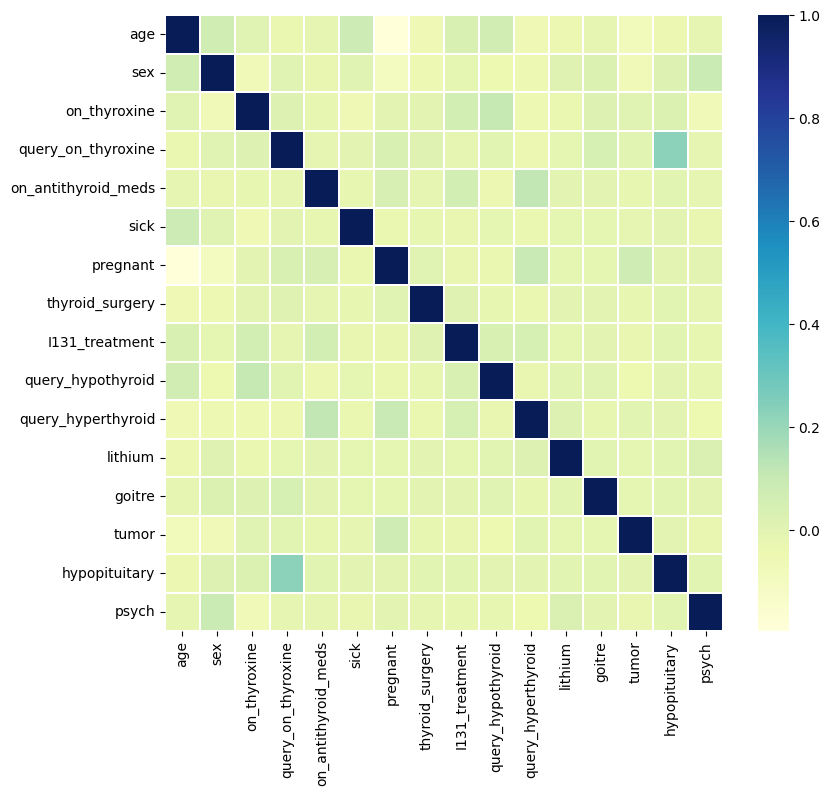

In [38]:
import seaborn as sns
corrmat=x.corr()
f,ax=plt.subplots(figsize=(9,8))
sns.heatmap(corrmat,ax=ax,cmap="YlGnBu",linewidths=0.1)


In [39]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=0)

In [40]:
y_train.value_counts()

target
4         471
2         351
1         302
6         265
5         230
3         144
0          26
dtype: int64

In [41]:
from imblearn.over_sampling import SMOTE
os=SMOTE(random_state=0,k_neighbors=1)
x_bal,y_bal=os.fit_resample(x_train,y_train)
x_test_bal,y_test_bal=os.fit_resample(x_test,y_test)

In [42]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_bal=sc.fit_transform(x_bal)
x_test_bal=sc.transform(x_test_bal)

In [43]:
x_bal

array([[-1.62721505, -0.44060477, -0.4238    , ..., -2.50870684,
        -1.40088079,  3.29445097],
       [-0.11561403, -0.44060477,  2.35960359, ..., -0.26259147,
         0.0720981 , -0.19494049],
       [ 1.1874903 ,  2.26960776, -0.4238    , ...,  0.17039463,
        -0.19352104, -0.19494049],
       ...,
       [ 1.395987  , -0.44060477,  2.35960359, ...,  0.43615031,
         0.06101022, -0.19494049],
       [ 0.72802783, -0.44060477,  2.35960359, ...,  0.143333  ,
         0.89086631, -0.19494049],
       [ 1.15628145, -0.44060477,  2.35960359, ...,  0.39723515,
        -0.26588659, -0.19494049]])

In [44]:
x_test_bal

array([[-1.5229667 , -0.44060477, -0.4238    , ...,  1.06342846,
         0.13246609, -0.19494049],
       [-0.89747663, -0.44060477, -0.4238    , ...,  1.76703086,
        -0.30218342, -0.19494049],
       [-0.9496008 ,  2.26960776, -0.4238    , ..., -0.39789962,
        -0.90586329, -0.19494049],
       ...,
       [ 1.39013447, -0.44060477,  2.35960359, ...,  0.81835453,
         0.70094189, -0.19494049],
       [ 1.33846247, -0.44060477,  2.35960359, ...,  0.81987378,
         0.67327619, -0.19494049],
       [-0.19842352, -0.44060477, -0.4238    , ...,  0.24830842,
         0.37610348, -0.19494049]])

In [45]:
 y_bal.value_counts()

target
0         471
1         471
2         471
3         471
4         471
5         471
6         471
dtype: int64

In [46]:
columns=['age',	'sex'	,'on_thyroxine','query_on_thyroxine','on_antithyroid_meds',	'sick',	'pregnant',	'thyroid_surgery','I131_treatment',	'query_hypothyroid','goitre',	'tumor',	'hypopituitary',	'psych',	'TSH',	'T3',	'TT4',	'T4U',	'FTI',	'TBG','target','patient id']

In [47]:
x_test_bal=pd.DataFrame(x_test_bal,columns=columns)

In [48]:
x_bal=pd.DataFrame(x_bal,columns=columns)

In [49]:
x_bal

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_meds,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,hypopituitary,psych,TSH,T3,TT4,T4U,FTI,TBG,target,patient id
0,-1.627215,-0.440605,-0.423800,-0.105069,-0.158703,-0.141815,-0.137297,-0.239601,-0.162675,-0.230986,...,-0.052319,-0.137297,-0.024637,-0.107982,-0.315458,-1.035358,-1.704935,-2.508707,-1.400881,3.294451
1,-0.115614,-0.440605,2.359604,-0.105069,-0.158703,-0.141815,-0.137297,-0.239601,-0.162675,-0.230986,...,-0.052319,-0.137297,-0.024637,-0.107982,-0.090056,0.155233,-0.197223,-0.262591,0.072098,-0.194940
2,1.187490,2.269608,-0.423800,-0.105069,-0.158703,-0.141815,-0.137297,-0.239601,-0.162675,-0.230986,...,-0.052319,-0.137297,-0.024637,-0.107982,-0.278907,-0.471394,-0.227079,0.170395,-0.193521,-0.194940
3,-1.366594,-0.440605,-0.423800,-0.105069,-0.158703,-0.141815,-0.137297,-0.239601,-0.162675,-0.230986,...,-0.052319,7.283487,-0.024637,-0.107982,-0.284999,0.969848,0.041622,0.495134,-0.133153,-0.194940
4,-0.167738,-0.440605,-0.423800,-0.105069,-0.158703,-0.141815,-0.137297,-0.239601,-0.162675,-0.230986,...,-0.052319,-0.137297,-0.024637,-0.107982,-0.306321,4.541622,1.459767,-0.127283,1.496783,-0.194940
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3292,0.546923,-0.440605,2.359604,-0.105069,-0.158703,-0.141815,-0.137297,-0.239601,-0.162675,-0.230986,...,-0.052319,-0.137297,-0.024637,-0.107982,-0.114424,0.343221,-0.148122,-0.146517,0.040168,-0.194940
3293,0.383062,-0.440605,2.359604,-0.105069,-0.158703,-0.141815,-0.137297,-0.239601,-0.162675,-0.230986,...,-0.052319,-0.137297,-0.024637,-0.107982,-0.309176,-0.856540,0.565143,-0.513902,1.085434,-0.194940
3294,1.395987,-0.440605,2.359604,-0.105069,-0.158703,-0.141815,-0.137297,-0.239601,-0.162675,-0.230986,...,-0.052319,-0.137297,-0.024637,-0.107982,-0.095452,-0.172405,0.248906,0.436150,0.061010,-0.194940
3295,0.728028,-0.440605,2.359604,-0.105069,-0.158703,-0.141815,-0.137297,-0.239601,-0.162675,-0.230986,...,-0.052319,-0.137297,-0.024637,-0.107982,-0.311566,0.087864,1.071643,0.143333,0.890866,-0.194940


In [50]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report
rfr=RandomForestClassifier().fit(x_bal,y_bal)
y_pred=rfr.predict(x_test_bal)
accuracy_score(y_test_bal,y_pred)
x_bal.shape,y_bal.shape,x_test_bal.shape,y_test_bal.shape

<ipython-input-50-eab2b6da9fbc>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfr=RandomForestClassifier().fit(x_bal,y_bal)


((3297, 22), (3297, 1), (854, 22), (854, 1))

In [51]:
test_score=accuracy_score(y_test_bal,y_pred)
test_score

0.905152224824356

In [52]:
train_score=accuracy_score(y_bal,rfr.predict(x_bal))
train_score

1.0

In [53]:
from sklearn.inspection import permutation_importance
results=permutation_importance(rfr,x_bal,y_bal,scoring='accuracy')

feature:age                  score:0.0
feature:sex                  score:0.0
feature:on_thyroxine         score:0.0
feature:query_on_thyroxine   score:0.0
feature:on_antithyroid_meds  score:0.0
feature:sick                 score:0.0
feature:pregnant             score:0.0
feature:thyroid_surgery      score:0.0003033060357900963
feature:I131_treatment       score:0.0006066120715801926
feature:query_hypothyroid    score:0.0006672732787382119
feature:query_hyperthyroid   score:0.0015165301789505925
feature:lithium              score:0.0015165301789505925
feature:goitre               score:0.0027904155292690414
feature:tumor                score:0.009948437973915692
feature:hypopituitary        score:0.014740673339399457
feature:psych                score:0.0456778889899909
feature:TSH                  score:0.048468304519259944
feature:T3                   score:0.06945708219593572
feature:TT4                  score:0.13096754625417045
feature:T4U                  score:0.1822869275098574

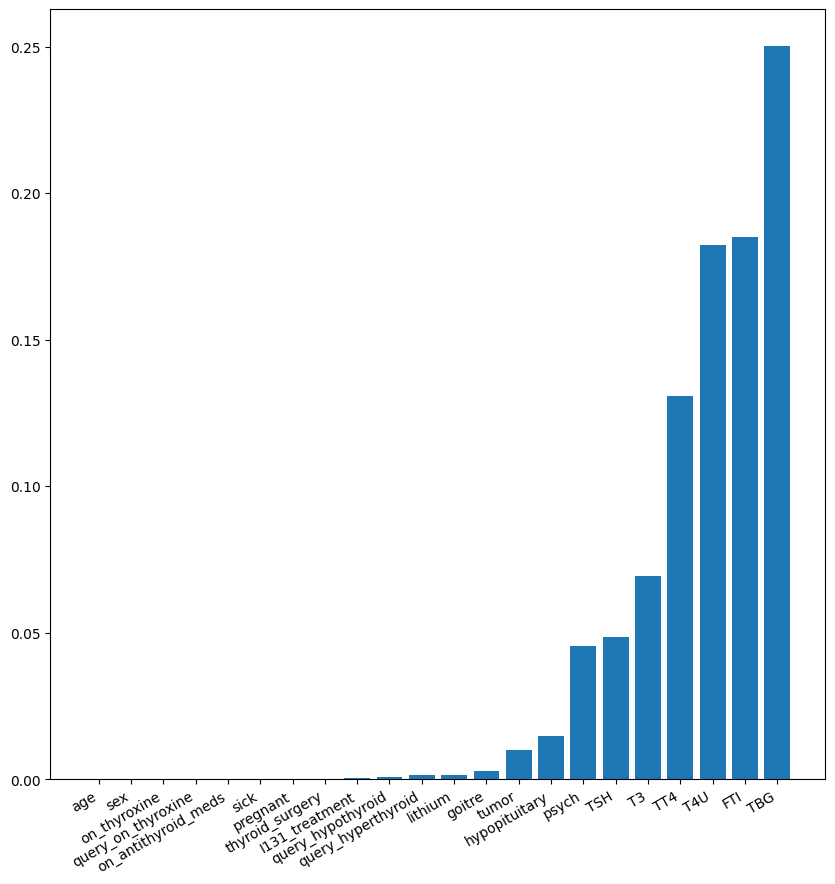

In [54]:
feature_importance=['age',	'sex'	,'on_thyroxine','query_on_thyroxine','on_antithyroid_meds',	'sick',	'pregnant',	'thyroid_surgery','I131_treatment',	'query_hypothyroid','query_hyperthyroid','lithium','goitre',	'tumor',	'hypopituitary',	'psych',	'TSH',	'T3',	'TT4',	'T4U',	'FTI',	'TBG',]
importance=results.importances_mean
importance=np.sort(importance)
for i,v in enumerate(importance):
  i=feature_importance[i]
  print('feature:{:<20} score:{}'.format(i,v))

plt.figure(figsize=(10,10))
plt.bar(x=feature_importance,height=importance)
plt.xticks(rotation=30,ha='right')
plt.show()

In [81]:
x_bal.drop(['age',	'sex'	,'on_thyroxine','query_on_thyroxine','on_antithyroid_meds',	'sick',	'pregnant',	'thyroid_surgery','I131_treatment',	'query_hypothyroid'],axis=1,inplace=True)

In [82]:
x_test_bal.drop(['age',	'sex'	,'on_thyroxine','query_on_thyroxine','on_antithyroid_meds',	'sick',	'pregnant',	'thyroid_surgery','I131_treatment',	'query_hypothyroid'],axis=1,inplace=True)

In [84]:
x_bal.head()

,goitre,tumor,hypopituitary,psych,TSH,T3,TT4,T4U,FTI,TBG,target,patient id
0,-0.267391,-0.06044,-0.052319,-0.137297,-0.024637,-0.107982,-0.315458,-1.035358,-1.704935,-2.508707,-1.400881,3.294451
1,-0.267391,-0.06044,-0.052319,-0.137297,-0.024637,-0.107982,-0.090056,0.155233,-0.197223,-0.262591,0.072098,-0.194940
2,-0.267391,-0.06044,-0.052319,-0.137297,-0.024637,-0.107982,-0.278907,-0.471394,-0.227079,0.170395,-0.193521,-0.194940
3,-0.267391,-0.06044,-0.052319,7.283487,-0.024637,-0.107982,-0.284999,0.969848,0.041622,0.495134,-0.133153,-0.194940
4,3.739835,-0.06044,-0.052319,-0.137297,-0.024637,-0.107982,-0.306321,4.541622,1.459767,-0.127283,1.496783,-0.194940


In [85]:
x_test_bal.head()

,goitre,tumor,hypopituitary,psych,TSH,T3,TT4,T4U,FTI,TBG,target,patient id
0,-0.267391,-0.06044,-0.052319,-0.137297,-0.024637,-0.107982,-0.312412,0.593872,0.788014,1.063428,0.132466,-0.19494
1,-0.267391,-0.06044,-0.052319,-0.137297,-0.024637,-0.107982,-0.314240,0.781860,0.444674,1.767031,-0.302183,-0.19494
2,-0.267391,-0.06044,-0.052319,-0.137297,-0.024637,-0.107982,1.298911,-0.408731,-1.227244,-0.397900,-0.905863,-0.19494
3,-0.267391,-0.06044,-0.052319,-0.137297,-0.024637,-0.107982,-0.166205,-0.471394,-0.227079,-0.397900,0.132466,-0.19494
4,-0.267391,-0.06044,-0.052319,-0.137297,-0.024637,-0.107982,-0.227125,-0.346068,-0.301718,-0.830886,0.434306,-0.19494


In [55]:
rfr1=RandomForestClassifier()
rfr1.fit(x_bal,y_bal)
y_pred=rfr1.predict(x_test_bal)

<ipython-input-55-eecd44340a2c>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfr1.fit(x_bal,y_bal)


In [56]:
print(classification_report(y_test_bal,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.80      0.88       122
           1       0.85      0.92      0.89       122
           2       0.95      0.98      0.96       122
           3       0.89      0.85      0.87       122
           4       0.82      0.98      0.89       122
           5       0.93      0.92      0.92       122
           6       0.98      0.93      0.95       122

    accuracy                           0.91       854
   macro avg       0.91      0.91      0.91       854
weighted avg       0.91      0.91      0.91       854



In [57]:
train_score=accuracy_score(y_bal,rfr1.predict(x_bal))

In [58]:
train_score

1.0

In [59]:
from xgboost import XGBClassifier
xgb=XGBClassifier()
xgb.fit(x_bal,y_bal)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [60]:
y_pred=xgb.predict(x_test_bal)

In [61]:
print(classification_report(y_test_bal,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.73      0.83       122
           1       0.90      0.94      0.92       122
           2       0.95      1.00      0.98       122
           3       0.89      0.88      0.88       122
           4       0.81      0.97      0.88       122
           5       0.87      0.91      0.89       122
           6       1.00      0.91      0.95       122

    accuracy                           0.91       854
   macro avg       0.91      0.91      0.90       854
weighted avg       0.91      0.91      0.90       854



In [62]:
train_score=accuracy_score(y_bal,xgb.predict(x_bal))

In [63]:
train_score

1.0

In [64]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,classification_report
sv=SVC()

In [65]:
sv.fit(x_bal,y_bal)

/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC()

In [66]:
y_pred=sv.predict(x_test_bal)

In [67]:
print(classification_report(y_test_bal,y_pred))

              precision    recall  f1-score   support

           0       0.83      1.00      0.91       122
           1       0.78      0.80      0.79       122
           2       0.79      0.88      0.83       122
           3       0.84      0.63      0.72       122
           4       0.91      0.67      0.77       122
           5       0.72      0.82      0.77       122
           6       0.90      0.93      0.92       122

    accuracy                           0.82       854
   macro avg       0.82      0.82      0.81       854
weighted avg       0.82      0.82      0.81       854



In [68]:
train_score=accuracy_score(y_bal,sv.predict(x_bal))
train_score

0.8635122838944495

In [69]:
import pickle
pickle.dump(xgb,open('thyroid_l_model.pkl','wb'))

In [75]:
features=np.array([[0,0,0,0,0.000,0.0,0,0.0,0.0,1.00,0.0,0,0,0.0,0,0.0,0,0,0,0.0,0,40.0]])
print(label_encoder.inverse_transform(xgb.predict(features)))

['hypothyroid conditions']


In [76]:
type(features)

numpy.ndarray

In [77]:
pickle.dump(label_encoder,open('label_encoder.pkl','wb'))

In [78]:
data['target'].unique()

array(['miscellaneous', 'hypothyroid conditions', 'binding protein',
       'replacement therapy', 'general health', 'hyperthyroid conditions',
       'antiyhyroid treatment'], dtype=object)

In [79]:
y['target'].unique()

array([5, 4, 1, 6, 2, 3, 0])